Entregas agrupadas por zona:
          x         y     Tipo  Cluster_zona
0 -2.509198  9.014286  Cliente             1
1  4.639879  1.973170  Cliente             2
2 -6.879627 -6.880110  Cliente             0
3 -8.838328  7.323523  Cliente             1
4  2.022300  4.161452  Cliente             2

Rota Otimizada para o Entregador da Zona 0: ['Restaurante', 'Cliente_2', 'Cliente_4', 'Cliente_1', 'Cliente_0', 'Cliente_7', 'Cliente_5', 'Cliente_3', 'Cliente_6']
Distância Total Estimada: 24.16 km


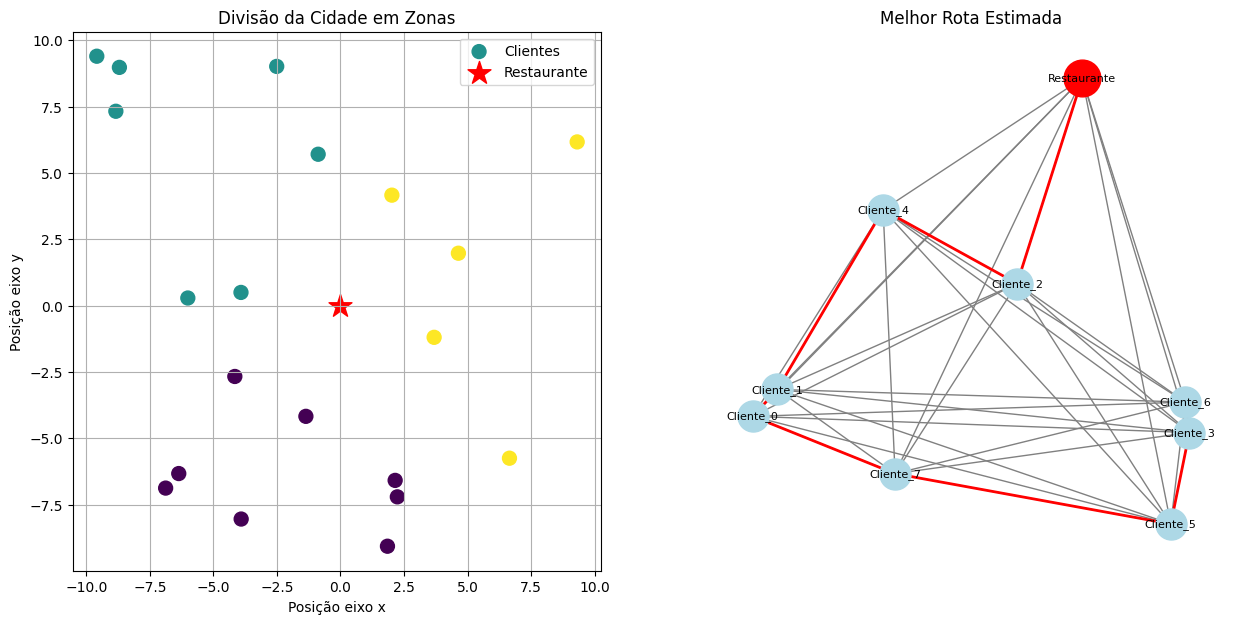

In [6]:
#=================================
# ROTA INTELIGENTE - SABOR EXPRESS
#=================================

# Importação de Bibliotecas
import numpy as np # Manipulação de dados numericos e operações matematicas
import pandas as pd # Manipulação de dados em tabelas
import matplotlib.pyplot as plt # Criação de graficos
import networkx as nx # Criação e manipulalção de grafos

# Importação de Modulos de Bibliotecas
from sklearn.cluster import KMeans # Algoritmo de Agrupamento
from scipy.spatial.distance import cdist # Calculo de Distancias

# Geração de Dados
np.random.seed(42) # Define a mesma sequencia de aleatoridade em cada execução
n_entregas = 20 # numero de amostras (contexto: numero de entregas)
restaurante = np.array([[0,0]]) # Localização do Restaurante (X=0, Y=0)
entregas = np.random.uniform(-10, 10, size=(n_entregas, 2)) # Definição de limite das entregas em relação ao restaurante

# Criação de DataFrame
df = pd.DataFrame(entregas, columns=['x', 'y'])
df['Tipo'] = 'Cliente'

# Clustering Agrupação por Zonas
k_entregadores = 3 # Definimos o numero de entregadores
modelo_kmeans = KMeans(n_clusters = k_entregadores, random_state = 42) # Definimos para o Kmeans un numero de clusters equivalente ao numero de entregadores
df['Cluster_zona'] = modelo_kmeans.fit_predict(df[['x', 'y']]) # Nosso modelo identificas o seus centroides agrupa os dados e armazena as informações dentro da coluna Cluster_zona

print("Entregas agrupadas por zona:")
print(df.head())

# Optimização regional de rotas com grafos
zona_0 = df[df['Cluster_zona'] == 0].copy() # Designamos para a variavel zona_0 as entregas correspondientes a esta zona
coords_zona_0 = zona_0[['x', 'y']].values # Designamos para a variavel coords_zona_0 as coordenadas da zona correspondente

# Adicionar Restaurante como ponto de partida
pontos_rota = np.vstack([restaurante, coords_zona_0]) # Criação de losta com coordenadas restaurante/clientes
nomes_nos = ['Restaurante'] + [f'Cliente_{i}' for i in range(len(coords_zona_0))] # Atribuir o o rotulo de cliente para cada nó

# Criando o Grafo zona 0
Grafo = nx.Graph()

# Adicionando nós
for i, nome in enumerate(nomes_nos): # nomear nós
 Grafo.add_node(nome, pos=(pontos_rota[i][0], pontos_rota[i][1])) # Adicionar nó segundo as coordenadas

# Adicionando arestas
distancias = cdist(pontos_rota, pontos_rota, metric='euclidean') # Comparação entre todos os nós da fronteira de desição
for i in range(len(nomes_nos)): # Atribuir valor i segundo o indice nome_nos
 for j in range(i + 1, len(nomes_nos)): # Atribuir i + 1 ao j
  Grafo.add_edge(nomes_nos[i], nomes_nos[j], weigth=distancias[i][j]) # Criar aresta com peso i e j

# Algoritmo de busca
rota_final = ['Restaurante'] #
visitados = set(['Restaurante']) # Lista set com os nós ja visitados
atual = 'Restaurante' # Nó atual
distancia_total = 0 # Distancia total percorrida

# Loop para visitar todos os clientes da zona
while len(visitados) < len(nomes_nos): # continuar com o loop se visitados < nomes_nos
 vizinhos = Grafo[atual] # Visualizar todos caminhos ate os clientes apartir do ponto atual
 menor_dist = float('inf') # Definimos uma distacia infinita como comparação com as outras distancias
 proximo_no = None # Variavel vazia que mostrara ao proximo cliente escolhido

# Procura o vizinho nao visitado mais proximo (Evitar Loop entre dois clientes ja visitados)
 for vizinho, dados in vizinhos.items(): # Loop de verificação dos pesos entre os nós mais crecanos ao atual
   if vizinho not in visitados: # Verificar se vizinhos ja foi visitado
    dist = dados['weigth'] # Atribuição de dados do vizinho (peso) à vaiavel dist
    if dist < menor_dist: # Se valor dist < menor_dist
      menor_dist = dist # Atribuir valor dist para a variavel menor_dist
      proximo_no = vizinho # Atualizar proximo_no para o vizinho nao visitado

# Atualizar a rota
 if proximo_no: # se existir um proximo nó
   rota_final.append(proximo_no) # Adicionar o proximo nó a lista
   visitados.add(proximo_no) # Adicionar o proximo nó a lista de visitados
   distancia_total += menor_dist # Somar menor_dist à distacia_total
   atual = proximo_no # Atualizar o nó atual para o proximo nó

print(f"\nRota Otimizada para o Entregador da Zona 0: {rota_final}")
print(f"Distância Total Estimada: {distancia_total:.2f} km")

# Contrução de Graficos
plt.figure(figsize = (15,7)) # Janela onde os graficos serão criados Lagura (15) / Altura (7)

# Grafico 1: Kmeans
plt.subplot(1,2,1) # Criamos uma linha e duas columnas para o posicionamento dos graficos, comenzando do lado esquerdo
plt.scatter(df['x'], df['y'], c=df['Cluster_zona'], cmap='viridis', s=100, label='Clientes') # Criação de pontos "Clientes" com paleta de cores "viridis"
plt.scatter(restaurante[0][0], restaurante[0][1], c='red', marker='*', s=300, label='Restaurante') # Indicamos o item desejando (restaurante[0][0]) e a posição das suas coordenadas (restaurante[0][1])
plt.title("Divisão da Cidade em Zonas") # Titulo do grafico
plt.xlabel("Posição eixo x") # Label eixo x
plt.ylabel("Posição eixo y") # Label eixo y
plt.legend()
plt.grid(True)

# Gráfico 2: Melhor Caminho
plt.subplot(1,2,2)
pos = nx.get_node_attributes(Grafo, 'pos') # Resgata as coordenadas (X, Y) armazenados em cada nó

nx.draw(Grafo, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, edge_color='gray') # Desenhar o grafo com as coordenadas dos nós / arestas cinzas / nós azul claro
arestas_rota = [(rota_final[i], rota_final[i+1]) for i in range(len(rota_final)-1)] # Cria conexoes entre pontos seguindo os item da lista rota_final
nx.draw_networkx_edges(Grafo, pos, edgelist=arestas_rota, edge_color='red', width=2) # Desenhar arestas em vermelho
nx.draw_networkx_nodes(Grafo, pos, nodelist=['Restaurante'], node_color='red', node_size=700) # Destacar Restaurante em vermelho

plt.title("Melhor Rota Estimada")
plt.show()